In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
from pyspark.sql import SparkSession
from hdfs import InsecureClient
import json
import ast

In [2]:
hdfs_client = InsecureClient('http://localhost:9870', user='root')
hdfs_files = hdfs_client.list('/')
# df = spark.read.csv('hdfs://namenode:9000/')
# df = pd.concat(map(pd.read_csv, glob.glob("/*.csv")))
frames = []
for hdfs_file in hdfs_files:
    # print(f'[x] Reading: {hdfs_file}')
    with hdfs_client.read('/' + hdfs_file) as reader:
        frame = pd.read_csv(reader)
        frames.append(frame)

data = pd.concat(frames)
# data = pd.read_csv("./result.csv")

In [3]:
# spark = SparkSession.builder.master('local').appName('metacritics').getOrCreate()

# # df = spark.read.option("multiline","true").json("hdfs://namenode:9000/films-*.csv")
# # hdfs_client = InsecureClient('http://localhost:9870', user='root')
# # hdfs_files = hdfs_client.list('/')
# df = spark.read.csv('hdfs://namenode:9000/')

# print(df.show(10))

In [19]:
data.head(10)

,Unnamed: 0,title,year,image,distributor,release_date,num_of_critic,critic_positive,critic_mixed,critic_negative,...,stars,facts,summary,director,genres,rating,runtime,_id,film,author
0,0,West Side Story,2021.0,https://static.metacritic.com/images/products/...,Twentieth Century Fox,"December 10, 2021",62.0,56.0,6.0,0.0,...,"['Ana Isabelle', 'Ansel Elgort', 'Ariana DeBos...",['Nominated for 7 Oscars including Best Pictur...,This reimagining of the beloved musical West S...,Steven Spielberg,"['Drama', 'Romance', 'Crime', 'Musical']",PG-13,156.0,NaN,NaN,NaN
0,0,Song of the Sea,2014.0,https://static.metacritic.com/images/products/...,GKIDS,"December 19, 2014",24.0,24.0,0.0,0.0,...,[],[],"Ben and his little sister Saoirse, the last Se...",Tomm Moore,"['Fantasy', 'Animation', 'Family']",PG,93.0,NaN,NaN,NaN
0,0,Amy,2015.0,https://static.metacritic.com/images/products/...,A24,"July 3, 2015",41.0,40.0,1.0,0.0,...,"['Amy Winehouse', 'Mark Ronson', 'Mitch Wineho...",[],Amy tells the story of six-time Grammy-winner ...,Asif Kapadia,"['Biography', 'Music', 'Documentary']",Not Rated,128.0,NaN,NaN,NaN
0,0,The Edge of Heaven,2008.0,https://static.metacritic.com/images/products/...,Strand Releasing,"May 21, 2008",26.0,25.0,1.0,0.0,...,[],[],Nejat initially disapproves of his widower fat...,Fatih Akin,['Drama'],NaN,116.0,NaN,NaN,NaN
0,0,The Savages,2007.0,https://static.metacritic.com/images/products/...,Fox Searchlight Pictures,"November 28, 2007",37.0,37.0,0.0,0.0,...,"['Laura Linney', 'Philip Bosco', 'Philip Seymo...",[],"The Savages is an irreverent look at family, l...",Tamara Jenkins,"['Drama', 'Comedy']",R,113.0,NaN,NaN,NaN
0,0,Birds of Passage,2019.0,https://static.metacritic.com/images/products/...,Interior13 Cine,"February 13, 2019",27.0,25.0,1.0,1.0,...,"['Aslenis Márquez', 'Carmiña Martínez', 'Greid...",[],From the Oscar®-nominated team behind the genr...,Ciro Guerra,['Drama'],Not Rated,125.0,NaN,NaN,NaN
0,0,Ilo Ilo,2014.0,https://static.metacritic.com/images/products/...,Film Movement,"April 4, 2014",12.0,11.0,1.0,0.0,...,[],[],Set in Singapore during the 1997 Asian financi...,Anthony Chen,['Drama'],Not Rated,99.0,NaN,NaN,NaN
0,0,First Reformed,2018.0,https://static.metacritic.com/images/products/...,A24,"May 18, 2018",48.0,45.0,3.0,0.0,...,"['Amanda Seyfried', 'Bill Hoag', 'Cedric the E...",[],Reverend Ernst Toller (Ethan Hawke) is a solit...,Paul Schrader,"['Drama', 'Thriller']",Not Rated,113.0,NaN,NaN,NaN
0,0,A Serious Man,2009.0,https://static.metacritic.com/images/products/...,Focus Features,"October 2, 2009",38.0,32.0,5.0,1.0,...,"['Michael Stuhlbarg', 'Richard Kind', 'Sari Le...",[],A Serious Man is the story of an ordinary man’...,Ethan Coen,['Drama'],R,106.0,NaN,NaN,NaN
0,0,Lebanon,2010.0,https://static.metacritic.com/images/products/...,Sony Pictures Classics,"August 6, 2010",28.0,25.0,3.0,0.0,...,[],[],"June, 1982 - The First Lebanon War. A lone tan...",Samuel Maoz,"['Drama', 'War']",R,93.0,NaN,NaN,NaN


Lấy các cột cần thiết để visualize data

In [22]:
with open("result.csv", "r", encoding='utf8') as source:
    reader = csv.reader(source)
for reader in data.to_csv():
    print(type(reader))
    with open("output.csv", "w", encoding='utf8') as result:
        writer = csv.writer(result)
        print(reader)
        for r in reader:
            # Use CSV Index to remove a column from CSV
            #r[3] = r['year']
            writer.writerow((r[1], r[2], r[3], r[4], r[14], r[17], r[18], r[19], r[23]))

<class 'str'>
,


IndexError: string index out of range

In [92]:
output = pd.read_csv("./output.csv")
output.head(10)

,title,year,distributor,release_date,rating_score,summary,director,genres/0,runtime
0,The Godfather,1972,Paramount Pictures,"March 24, 1972",9.2,Francis Ford Coppola's epic features Marlon Br...,Francis Ford Coppola,Drama,175
1,Citizen Kane,1941,RKO Radio Pictures,"September 4, 1941",8.4,"Following the death of a publishing tycoon, ne...",Orson Welles,Drama,119
2,Rear Window,1954,Paramount Pictures,"September 1, 1954",8.7,A wheelchair-bound photographer spies on his n...,Alfred Hitchcock,Mystery,112
3,Casablanca,1943,Warner Bros.,"January 23, 1943",8.8,"A Casablanca, Morocco casino owner in 1941 she...",Michael Curtiz,Drama,102
4,Boyhood,2014,IFC Films,"July 11, 2014",7.4,"Filmed over 12 years with the same cast, Richa...",Richard Linklater,Drama,165
5,Three Colors: Red,1994,Miramax,"November 23, 1994",8.5,Krzysztof Kieslowski closes his Three Colors t...,Krzysztof Kieslowski,Drama,99
6,Vertigo,1958,Paramount Pictures,"May 28, 1958",8.6,Vertigo creates a dizzying web of mistaken ide...,Alfred Hitchcock,Mystery,128
7,Notorious,1946,RKO Radio Pictures,"September 6, 1946",7.9,A woman is asked to spy on a group of Nazi fri...,Alfred Hitchcock,Drama,101
8,Singin' in the Rain,1952,Metro-Goldwyn-Mayer (MGM),"April 11, 1952",8.7,A silent film production company and cast make...,Gene Kelly,Comedy,103
9,City Lights,1931,United Artists,"March 7, 1931",8.7,The Tramp (Charlie Chaplin) struggles to help ...,Charles Chaplin,Drama,87


In [94]:
data.columns

Index(['Unnamed: 0', 'title', 'year', 'image', 'distributor', 'release_date',
       'num_of_critic', 'critic_positive', 'critic_mixed', 'critic_negative',
       'critic_score', 'num_of_rating', 'rating_positive', 'rating_mixed',
       'rating_negative', 'rating_score', 'stars', 'facts', 'summary',
       'director', 'genres', 'rating', 'runtime', '_id', 'film', 'author'],
      dtype='object')

In [93]:
output.rename(columns= {"genres/0" : "genres"}, inplace=True)
output.columns

Index(['title', 'year', 'distributor', 'release_date', 'rating_score',
       'summary', 'director', 'genres', 'runtime'],
      dtype='object')

In [95]:
print(len(output.genres.unique()))

22


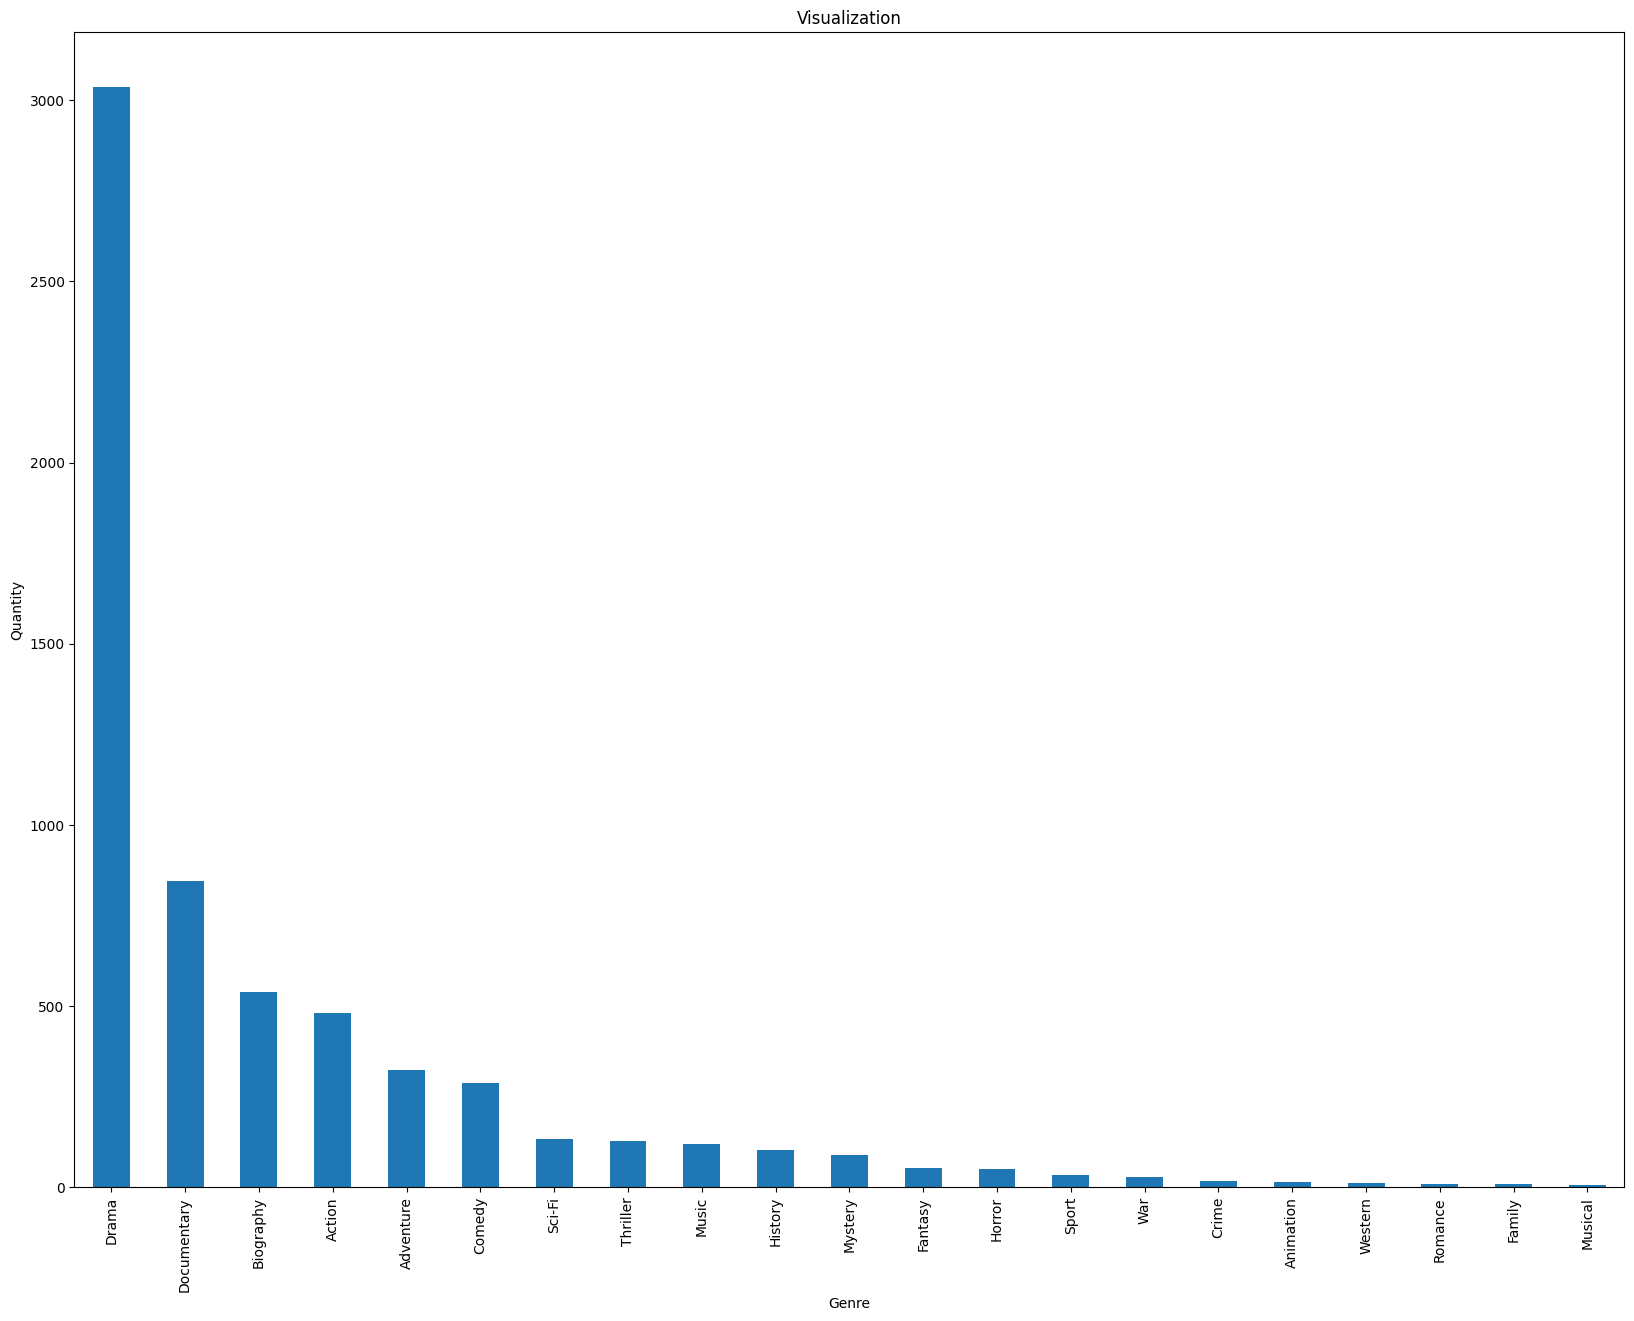

In [96]:
plt.figure(figsize = (20,15))
plt.title("Visualization")
output.genres.value_counts().plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()

In [100]:
output.loc[:, ["rating_score", "title"]].iloc[output["rating_score"].sort_values(ascending=False)[:10].index]

,rating_score,title
0,9.2,The Godfather
1762,9.0,Memento
1405,9.0,The Shawshank Redemption
1245,9.0,Star Wars: Episode V - The Empire Strikes Back
166,9.0,The Lord of the Rings: The Fellowship of the Ring
86,9.0,Pulp Fiction
5636,9.0,Selena
87,9.0,Pulp Fiction
238,9.0,The Godfather: Part II
92,8.9,Grave of the Fireflies (1988)


In [ ]:
runtime_10_film = output.loc[:, ["runtime", "title"]].iloc[output["runtime"].sort_values(ascending=False)[:10].index]

In [ ]:
output.loc[:, ["runtime", "title"]].iloc[output["runtime"].sort_values(ascending=False)[:10].index]

,runtime,title
2442,808,La Flor
346,495,Dead Souls
106,325,Carlos
4438,317,1900
2332,295,Red Riding Trilogy
119,273,Shoah: Four Sisters
1333,272,Mysteries of Lisbon
371,272,City Hall
3578,260,Watergate
310,255,When the Levees Broke: A Requiem in Four Acts


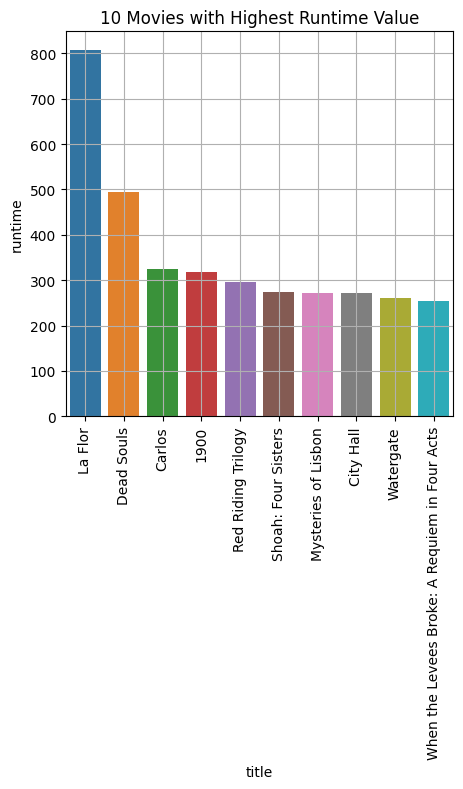

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x= "title", y= "runtime", data=runtime_10_film)
plt.title("10 Movies with Highest Runtime Value")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
rating_10_film = output.loc[:, ["rating_score", "title"]].iloc[output["rating_score"].sort_values(ascending=False)[:10].index]
rating_10_film

,rating_score,title
0,9.2,The Godfather
1762,9.0,Memento
1405,9.0,The Shawshank Redemption
1245,9.0,Star Wars: Episode V - The Empire Strikes Back
166,9.0,The Lord of the Rings: The Fellowship of the Ring
86,9.0,Pulp Fiction
5636,9.0,Selena
87,9.0,Pulp Fiction
238,9.0,The Godfather: Part II
92,8.9,Grave of the Fireflies (1988)


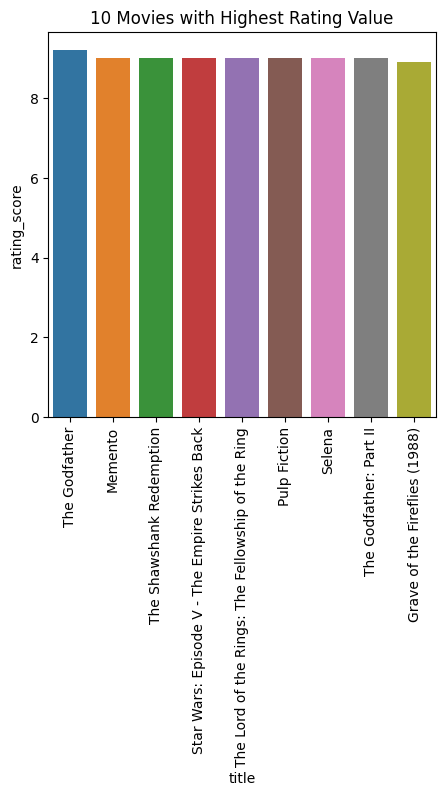

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x= "title", y= "rating_score", data=rating_10_film)
plt.title("10 Movies with Highest Rating Value")
plt.xticks(rotation=90)
plt.show()

In [101]:
yearfilter = output.query(' 2023>= year >= 2010')

years_runtime = yearfilter[["year", "runtime"]].groupby("year").sum()


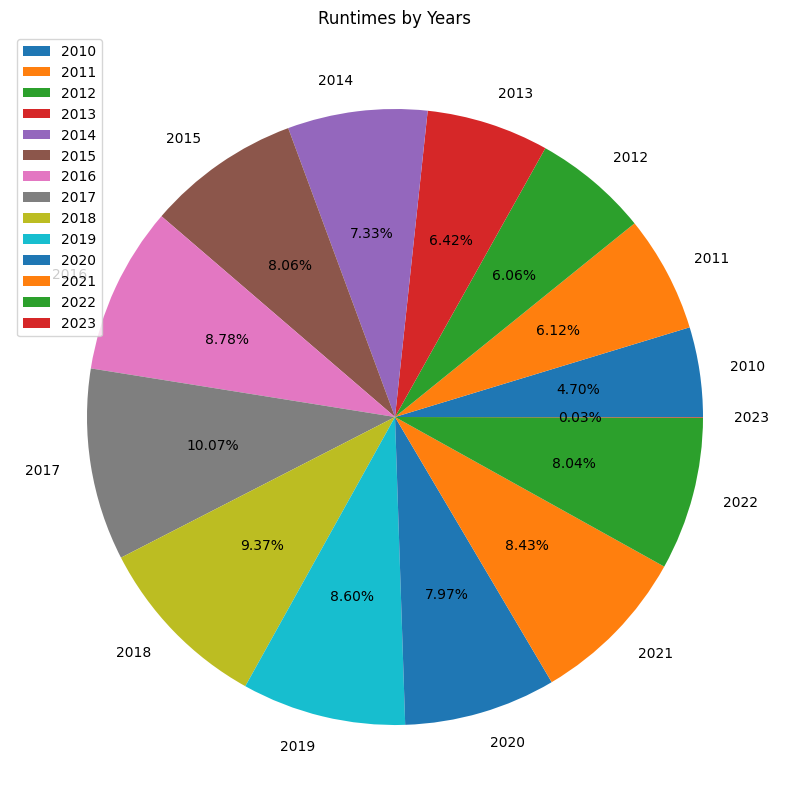

In [102]:
plt.figure(figsize=(10,10))
plt.pie(years_runtime["runtime"], autopct="%.2f%%", labels=years_runtime.index)
plt.legend()
plt.title("Runtimes by Years")
plt.show()

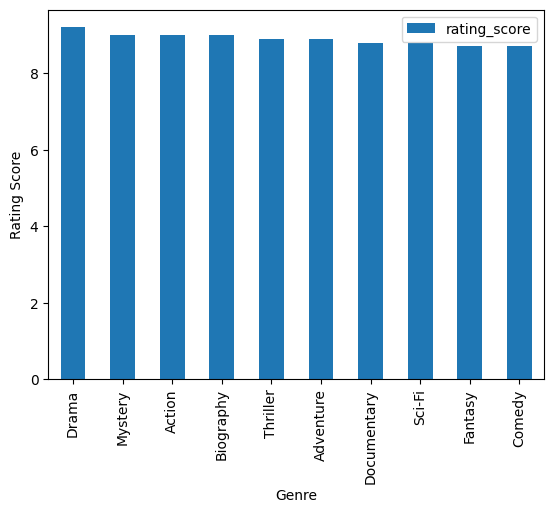

In [ ]:
output[['genres', 'rating_score']].sort_values('rating_score', ascending=False).drop_duplicates('genres').head(10).plot(x='genres', y='rating_score', kind='bar')
plt.xlabel('Genre')
plt.ylabel('Rating Score')
plt.show(block=True) #lay ra gia tri dau tien cua tung genres de truc quan hoa